# Madrigal Web Demo

In [1]:
import madrigalWeb.madrigalWeb
import pandas
import numpy
import datetime
import seaborn as sns
from davitpy import utils
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize

/usr/local/lib/python2.7/dist-packages/pandas/_libs/__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
/usr/local/lib/python2.7/dist-packages/pandas/__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import (hashtable as _hashtable,
/usr/local/lib/python2.7/dist-packages/pandas/core/dtypes/common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import algos, lib
/usr/local/lib/python2.7/dist-packages/pandas/core/util/hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from pandas._libs import hashing, tslib
/usr/local/lib/python2.7/dist-packages/pandas/core/indexes/base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate bi

## Connect to MadrigalWeb

In [2]:
madDB = madrigalWeb.madrigalWeb.MadrigalData('http://madrigal.haystack.mit.edu/madrigal')

## Get Instruments

In [3]:
instList = madDB.getAllInstruments()

In [4]:
print "total instruments--->", len(instList)
print "-------Unique Instrument List-------"
print set( [_i.category for _i in instList] )
print "-------Unique Instrument List-------"

total instruments---> 180
-------Unique Instrument List-------
set([u'Distributed Ground Based Satellite Receivers', u'Lidars', u'Geophysical Indices', u'Photometers', u'Fabry-Perots', u'Individual Ground Based Satellite Receivers', u'Imagers', u'Michelson Interferometers', u'MST Radars', u'Coherent Scatter Radars', u'Meteor Radars', u'MF Radars', u'Ionosondes', u'Satellite Instruments', u'Magnetometers', u'HF Radars', u'Incoherent Scatter Radars', u'Modelled data'])
-------Unique Instrument List-------


## List all ISRs; we'll choose Millstone Hill 

In [5]:
isrList = set( [ _i.name for _i in instList\
                if _i.category == "Incoherent Scatter Radars"  ] )
print "-------ALL Incoherent Scatter radars-------" 
print isrList

-------ALL Incoherent Scatter radars-------
set([u'Arecibo IS Radar - Linefeed', u'Kharkov Ukraine IS Radar', u'Arecibo IS Radar - Velocity Vector', u'MU IS Radar', u'EISCAT Kiruna VHF IS Receiver', u'St. Santin IS Radar', u'EISCAT Kiruna UHF IS Receiver', u'St. Santin Monpazier Receiver', u'Chatanika IS Radar', u'Millstone Hill UHF Steerable Antenna', u'Arecibo IS Radar - Gregorian', u'EISCAT Sodankyl\xe4 UHF IS Receiver', u'Poker Flat IS Radar', u'EISCAT Tromso VHF IS radar', u'EISCAT combined IS Radars', u'St. Santin Mende Receiver', u'Resolute Bay North IS Radar', u'QuJing IS radar', u'Resolute Bay Canada IS Radar', u'EISCAT Troms\xf8 UHF IS radar', u'Jicamarca IS Radar', u'UK Malvern IS Radar', u'St. Santin Nan\xe7ay Receiver', u'Sondrestrom IS Radar', u'EISCAT Svalbard IS Radar Longyearbyen', u'ISTP Irkutsk Radar', u'EISCAT Sodankyl\xe4 VHF IS Receiver', u'Millstone Hill IS Radar', u'Millstone Hill UHF Zenith Antenna'])


In [6]:
for _i in instList:
    if _i.name == "Millstone Hill IS Radar":
        selInst = _i

In [7]:
print selInst
# select the code!
selInstCode = selInst.code

name: Arecibo IS Radar - Linefeed
code: 20
mnemonic: arl
latitude: 18.345
longitude: 293.25
altitude: 0.0
category: Incoherent Scatter Radars



## Code for MH ISR is 30
## We'll choose an experiment on Feb 2, 2013

In [8]:
exps = madDB.getExperiments(\
            selInstCode, 2013, 2, 2, 0, 0,\
            0, 2013, 2, 3, 0, 0, 0)

In [9]:
print "Num of exps found--->", len(exps)
selExp = exps[0]
print selExp

Num of exps found---> 1
id: 10002115
realUrl: http://madrigal.haystack.mit.edu/cgi-bin/madrigal/madExperiment.cgi?exp=experiments/2013/mlh/01feb13&displayLevel=0&expTitle=Van+Allen+Conjunction+Wide+Coverage
url: http://madrigal.haystack.mit.edu/cgi-bin/madrigal/madtoc/experiments/2013/mlh/01feb13
name: Van Allen Conjunction Wide Coverage
siteid: 1
sitename: Millstone
instcode: 30
instname: Millstone Hill IS Radar
startyear: 2013
startmonth: 2
startday: 1
starthour: 21
startmin: 0
startsec: 39
endyear: 2013
endmonth: 2
endday: 2
endhour: 20
endmin: 51
endsec: 8
isLocal: True
madrigalUrl: http://madrigal.haystack.mit.edu/madrigal
PI: Phil Erickson
PIEmail: perickson@haystack.mit.edu
uttimestamp: 1393908887
access: 0
Madrigal version: 2.6.4



## Download the data

In [10]:
fileList = madDB.getExperimentFiles(selExp.id)

## Get the desc of the file!
## and choose the one that we need

In [11]:
for _n,_f in enumerate(fileList):
    print _n,_f.kindatdesc

0 Combined basic parameters file - all antennas and modes
1 Zenith single-pulse basic parameters
2 Zenith alternating-code basic parameters
3 MISA (steerable) single-pulse basic parameters
4 MISA (steerable) alternating-code basic parameters
5 Gridded data fitted to a uniform spatial and temporal grid - useful for modellers
6 Derived vector ion velocities


## We'll choose the basic parameters
## Setup params for the download!

In [12]:
userName = 'Bharat Kunduri' 
userEmail = 'bharatr@vt.edu' 
userAffltn = 'VT'
dwnldFile = '../data/MH.hdf5'
dwnldformat = "hdf5"

In [13]:
madDB.downloadFile( fileList[0].name, dwnldFile,\
                   userName, userEmail,\
                   userAffltn, format=dwnldformat )

## Read contents of the HDF5 File
## There are different "keys" in the file
## such as metadata, actual data and the table layout.

In [14]:
# Get the appropriate keys
print pandas.HDFStore("./MH.hdf5").keys()

['/Data/Table Layout', '/Metadata/Data Parameters', '/Metadata/Experiment Notes', '/Metadata/Experiment Parameters', '/Data/Array Layout/Array with kinst=31 and mdtyp=115 and pl=0.00048 /Layout Description', '/Data/Array Layout/Array with kinst=31 and mdtyp=115 and pl=0.002 /Layout Description', '/Data/Array Layout/Array with kinst=31 and mdtyp=97 and pl=0.00048 /Layout Description', '/Data/Array Layout/Array with kinst=32 and mdtyp=115 and pl=0.00048 /Layout Description', '/Data/Array Layout/Array with kinst=32 and mdtyp=97 and pl=0.00048 /Layout Description', '/Data/Array Layout/Array with kinst=32 and mdtyp=97 and pl=0.00048 /1D Parameters/Data Parameters', '/Data/Array Layout/Array with kinst=32 and mdtyp=97 and pl=0.00048 /2D Parameters/Data Parameters', '/Data/Array Layout/Array with kinst=32 and mdtyp=115 and pl=0.00048 /1D Parameters/Data Parameters', '/Data/Array Layout/Array with kinst=32 and mdtyp=115 and pl=0.00048 /2D Parameters/Data Parameters', '/Data/Array Layout/Array 

/usr/local/lib/python2.7/dist-packages/tables/__init__.py:90: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from .utilsextension import (
/usr/local/lib/python2.7/dist-packages/tables/file.py:35: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import hdf5extension
/usr/local/lib/python2.7/dist-packages/tables/link.py:33: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import linkextension
/usr/local/lib/python2.7/dist-packages/tables/table.py:28: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import tableextension
/usr/local/lib/python2.7/dist-packages/tables/index.py:33: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import indexesextension
/usr/local/lib/python2.7/dist-packages/tables/path.py

In [15]:
# First get a list of the params in the file!
paramsDF = pandas.HDFStore("./MH.hdf5")["/Metadata/Data Parameters"]
# List what is present in the DF
print paramsDF

    mnemonic                                       description  isError  \
0       YEAR                             Year (universal time)        0   
1      MONTH                            Month (universal time)        0   
2        DAY                              Day (universal time)        0   
3       HOUR                             Hour (universal time)        0   
4        MIN                           Minute (universal time)        0   
5        SEC                           Second (universal time)        0   
6   UT1_UNIX                  Unix seconds (1/1/1970) at start        0   
7   UT2_UNIX                    Unix seconds (1/1/1970) at end        0   
8      RECNO                             Logical Record Number        0   
9     KINDAT                                      Kind of data        0   
10     KINST                                   Instrument Code        0   
11     RANGE                                             Range        0   
12       AZ1             

## Read the data
## Convert the unix timestamp to Python datetime obj and choose the columns we need!

In [16]:
mhDF = pandas.HDFStore("./MH.hdf5")["/Data/Table Layout"]
mhDF["date1"] = pandas.to_datetime(mhDF["ut1_unix"], unit='s')
mhDF["date2"] = pandas.to_datetime(mhDF["ut2_unix"], unit='s')
# Convert ne/dne to log scale
mhDF["ne"] = numpy.log10(mhDF["ne"])
mhDF["dne"] = numpy.log10(mhDF["dne"])
# choose only those columns we need!
mhDF = mhDF[ ["date1", "date2", "gdlat", "gdalt",\
        "glon", "vo", "dvo", "ne", "dne",\
        "az1", "az2", "el1", "el2", "scntyp"] ]
mhDF.head()

,date1,date2,gdlat,gdalt,glon,vo,dvo,ne,dne,az1,az2,el1,el2,scntyp
0,2013-02-01 21:00:39,2013-02-01 21:03:35,42.57,141.67,-71.49,NaN,NaN,NaN,NaN,178.0,178.0,88.0,88.0,1.0
1,2013-02-01 21:00:39,2013-02-01 21:03:35,42.57,159.64,-71.49,-19.1,78.9,10.839477,10.003512,178.0,178.0,88.0,88.0,1.0
2,2013-02-01 21:00:39,2013-02-01 21:03:35,42.56,177.62,-71.49,-31.2,9.7,11.184802,9.170229,178.0,178.0,88.0,88.0,1.0
3,2013-02-01 21:00:39,2013-02-01 21:03:35,42.55,195.59,-71.49,-27.4,9.4,11.490095,9.300552,178.0,178.0,88.0,88.0,1.0
4,2013-02-01 21:00:39,2013-02-01 21:03:35,42.55,213.57,-71.49,-24.9,5.1,11.681003,9.217637,178.0,178.0,88.0,88.0,1.0


## select an azimuthal scan i.e., scntyp 2

In [17]:
mhDF = mhDF[ (mhDF["scntyp"] == 2) & (mhDF["el1"] <= 10) ]
d1 = datetime.datetime(2013,2,2,4,35)
d2 = datetime.datetime(2013,2,2,5,5)

In [18]:
mhDF = mhDF[(mhDF["date1"] >= d1) & (mhDF["date1"] <= d2)\
           & (mhDF["ne"] >= 10.)].dropna().reset_index(drop=True)
mhDF.head()

,date1,date2,gdlat,gdalt,glon,vo,dvo,ne,dne,az1,az2,el1,el2,scntyp
0,2013-02-02 04:40:13,2013-02-02 04:40:54,52.16,227.70,-66.60,-32.2,32.1,10.169463,8.849029,19.87,14.91,6.0,6.0,2.0
1,2013-02-02 04:40:13,2013-02-02 04:40:54,52.72,248.22,-66.25,-91.0,18.6,10.758562,9.204136,19.87,14.91,6.0,6.0,2.0
2,2013-02-02 04:40:13,2013-02-02 04:40:54,53.27,269.47,-65.89,-112.7,11.5,11.046585,9.280694,19.87,14.91,6.0,6.0,2.0
3,2013-02-02 04:40:13,2013-02-02 04:40:54,53.82,291.42,-65.52,-122.7,9.5,11.197099,9.432862,19.87,14.91,6.0,6.0,2.0
4,2013-02-02 04:40:13,2013-02-02 04:40:54,54.36,314.07,-65.15,-139.2,9.5,11.282609,9.520316,19.87,14.91,6.0,6.0,2.0


## Plot some data!

In [19]:
# setup plot params
coords = "geo"
plotParam = "ne"#"vo"
pltScale = [9.5, 12]#[ -500, 500. ]
pltCMap = ListedColormap( sns.color_palette("coolwarm") )

/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


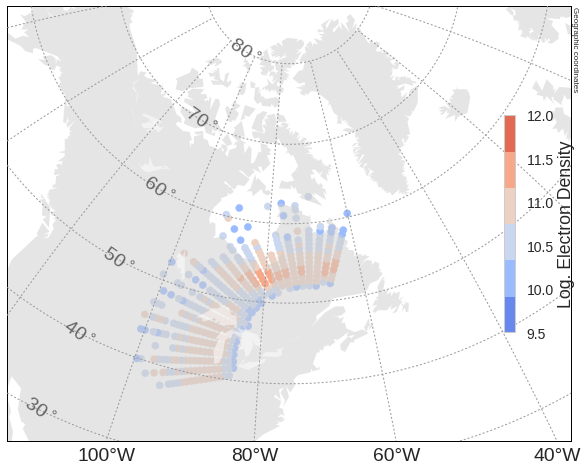

In [20]:
# seaborn styling
sns.set_style("whitegrid")
sns.set_context("poster")
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
m1 = utils.plotUtils.mapObj( coords=coords,\
                           lat_0=60., lon_0=-75, width=66e3*120,\
                           height=111e3*55, datetime=d1, gridLatRes=10. )

xVec, yVec = m1(mhDF["glon"].values,\
                mhDF["gdlat"].values, coords=coords)


colNorm = Normalize( vmin=pltScale[0], vmax=pltScale[1] )
paramPlt = m1.scatter(xVec, yVec, c=mhDF[plotParam].values,\
           vmin=pltScale[0], vmax=pltScale[1], s=50.,\
           alpha=1., cmap=pltCMap, norm=colNorm, ax=ax)
cbar = plt.colorbar(paramPlt, cmap=pltCMap, ax=ax, shrink=0.5, pad=-0.1)
cbar.set_label('Log. Electron Density')
cbar.ax.tick_params(labelsize=14) 

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    

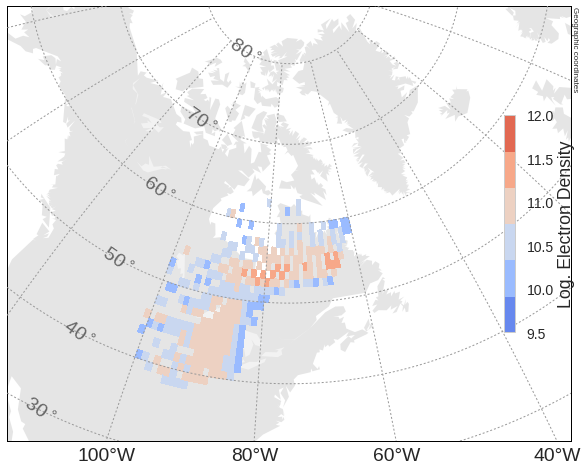

In [21]:
f = plt.figure(figsize=(12, 8))
ax = f.add_subplot(1,1,1)
m1 = utils.plotUtils.mapObj( coords=coords,\
                           lat_0=60., lon_0=-75, width=66e3*120,\
                           height=111e3*55, datetime=d1, gridLatRes=10. )

plotParamDF = mhDF[ ["glon", "gdlat",\
                        plotParam] ]
plotParamDF["gdlat"] = numpy.round(plotParamDF["gdlat"])
plotParamDF["glon"] = numpy.round(plotParamDF["glon"])

plotParamDF = plotParamDF.groupby( ["glon", "gdlat"] ).mean().reset_index()
plotParamDF = plotParamDF[ ["glon", "gdlat",\
                        plotParam] ].pivot( "glon", "gdlat" )

# plotParamDF = pandas.pivot_table( plotParamDF, values=plotParam,\
#                     index=[ "glon" ], columns=[ "gdlat"],\
#                     aggfunc=numpy.mean )
# print plotParamDF
glonVals = plotParamDF.index.values 
gdlatVals = plotParamDF.columns.levels[1].values

glonCntr, gdlatCntr  = numpy.meshgrid( glonVals, gdlatVals )
# Mask the nan values! pcolormesh can't handle them well!
paramVals = numpy.ma.masked_where(\
                numpy.isnan(plotParamDF[plotParam].values),\
                plotParamDF[plotParam].values)
meshPlot = m1.pcolormesh(glonCntr.T , gdlatCntr.T, paramVals,\
                        cmap=pltCMap, vmin=pltScale[0],\
                        vmax=pltScale[1], zorder=7, latlon=True)
cbar = plt.colorbar(meshPlot, cmap=pltCMap, ax=ax, shrink=0.5, pad=-0.1)
cbar.set_label('Log. Electron Density')
cbar.ax.tick_params(labelsize=14) 

## Some stats on electron density

In [22]:
mhDF["rndGlat"] = numpy.round( mhDF["gdlat"] )
neCount = mhDF[ ["rndGlat", "ne"]\
            ].groupby("rndGlat").size().reset_index()
neCount.columns = [ "rndGlat", "count" ]
print neCount

    rndGlat  count
0      38.0      4
1      39.0      9
2      40.0     14
3      41.0     17
4      42.0     11
5      43.0     14
6      44.0     19
7      45.0     20
8      46.0     10
9      47.0     17
10     48.0     17
11     49.0     14
12     50.0     16
13     51.0     17
14     52.0     27
15     53.0     30
16     54.0     28
17     55.0     20
18     56.0     21
19     57.0     18
20     58.0     11
21     59.0     10
22     60.0      3
23     61.0      3
24     62.0      3
25     63.0      2


In [23]:
print neCount["count"].describe()
# only get those values which are above the first quartile
frstQrt = neCount["count"].describe()["25%"]
neCount = neCount[ (neCount["count"] >= frstQrt) ]

count    26.000000
mean     14.423077
std       7.746860
min       2.000000
25%      10.000000
50%      15.000000
75%      18.750000
max      30.000000
Name: count, dtype: float64


In [24]:
print neCount

    rndGlat  count
2      40.0     14
3      41.0     17
4      42.0     11
5      43.0     14
6      44.0     19
7      45.0     20
8      46.0     10
9      47.0     17
10     48.0     17
11     49.0     14
12     50.0     16
13     51.0     17
14     52.0     27
15     53.0     30
16     54.0     28
17     55.0     20
18     56.0     21
19     57.0     18
20     58.0     11
21     59.0     10


In [25]:
neLatStats = mhDF[ ["rndGlat", "ne"]\
            ].groupby("rndGlat").median().reset_index()
neLatStats.columns = [ "rndGlat", "neMean" ]
neLatStd = mhDF[ ["rndGlat", "ne"]\
            ].groupby("rndGlat").std().reset_index()
neLatStd.columns = [ "rndGlat", "neStd" ]
print neLatStats
print neLatStd

    rndGlat     neMean
0      38.0  10.507860
1      39.0  10.866007
2      40.0  10.794067
3      41.0  10.817702
4      42.0  10.907333
5      43.0  10.855370
6      44.0  10.774900
7      45.0  10.862903
8      46.0  10.945165
9      47.0  10.689314
10     48.0  10.680891
11     49.0  10.542500
12     50.0  10.585800
13     51.0  10.524412
14     52.0  10.724009
15     53.0  11.009826
16     54.0  11.153145
17     55.0  10.987461
18     56.0  10.828990
19     57.0  10.658367
20     58.0  10.554536
21     59.0  10.314289
22     60.0  10.691762
23     61.0  10.323947
24     62.0  10.545400
25     63.0  10.406037
    rndGlat     neStd
0      38.0  0.086020
1      39.0  0.196252
2      40.0  0.272603
3      41.0  0.308599
4      42.0  0.318765
5      43.0  0.298539
6      44.0  0.294178
7      45.0  0.212469
8      46.0  0.289100
9      47.0  0.270697
10     48.0  0.239324
11     49.0  0.309715
12     50.0  0.175043
13     51.0  0.174554
14     52.0  0.320576
15     53.0  0.266700
16   

In [26]:
# Merge all the data together!
neLatStats = pandas.merge( neLatStats, neLatStd,\
                          on="rndGlat", how="inner" )
neLatStats = pandas.merge( neLatStats, neCount,\
                         on="rndGlat", how="inner" )
print neLatStats

    rndGlat     neMean     neStd  count
0      40.0  10.794067  0.272603     14
1      41.0  10.817702  0.308599     17
2      42.0  10.907333  0.318765     11
3      43.0  10.855370  0.298539     14
4      44.0  10.774900  0.294178     19
5      45.0  10.862903  0.212469     20
6      46.0  10.945165  0.289100     10
7      47.0  10.689314  0.270697     17
8      48.0  10.680891  0.239324     17
9      49.0  10.542500  0.309715     14
10     50.0  10.585800  0.175043     16
11     51.0  10.524412  0.174554     17
12     52.0  10.724009  0.320576     27
13     53.0  11.009826  0.266700     30
14     54.0  11.153145  0.201164     28
15     55.0  10.987461  0.233562     20
16     56.0  10.828990  0.132984     21
17     57.0  10.658367  0.199684     18
18     58.0  10.554536  0.161306     11
19     59.0  10.314289  0.289737     10


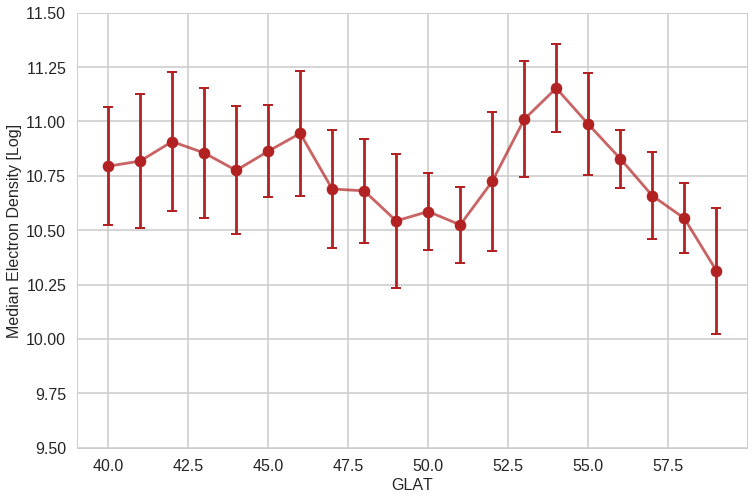

In [27]:
# seaborn styling
sns.set_style("whitegrid")
sns.set_context("poster")
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1,1,1)

ax1.scatter(neLatStats['rndGlat'],
            neLatStats['neMean'],
            marker='o',
            color='firebrick',
            alpha=0.7,
            s = 124)

ax1.plot(neLatStats['rndGlat'],
            neLatStats['neMean'],
            color='firebrick',
            alpha=0.7)

ax1.errorbar(neLatStats['rndGlat'],\
             neLatStats['neMean'],\
             yerr=neLatStats['neStd'], fmt='o', \
             color='firebrick', label='', capthick=2., capsize=5.)

ax1.set_ylim([9.5,11.5])

ax1.set_xlabel("GLAT", fontsize=16)
ax1.set_ylabel("Median Electron Density [Log]", fontsize=16)
plt.tick_params(labelsize=16)